In [13]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from networkx.algorithms import community as nxcomm
import itertools
import warnings
warnings.filterwarnings("ignore")

In [18]:
df = pd.read_excel("Eurovision_Full_Data.xlsx")
df=df[df["(semi-) final"]=="f"]
df=df[df["Year"]>=1998]
df=df[df["Year"]<=2009]
df.drop("Jury or Televoting",axis=1,inplace=True)
df.drop("Duplicate",axis=1,inplace=True)
df.drop("Edition",axis=1,inplace=True)
df.drop("(semi-) final",axis=1,inplace=True)
df.head()

,Year,From country,To country,Points
10216,1998,Belgium,Belgium,0
10217,1998,Belgium,Croatia,5
10218,1998,Belgium,Cyprus,2
10219,1998,Belgium,Estonia,0
10220,1998,Belgium,F.Y.R. Macedonia,0


In [19]:
df_orig=df
df2008=df[df["Year"]==2008]
df2008.reset_index(inplace=True)
df2008.drop("index",axis=1,inplace=True)
df2008.drop("Year",axis=1,inplace=True)
df2008.columns = ['source', 'target', 'weight']
df2008=df2008[df2008["weight"]>0]


df1998=df[df["Year"]==1998]
df1998.reset_index(inplace=True)
df1998.drop("index",axis=1,inplace=True)
df1998.drop("Year",axis=1,inplace=True)
df1998.columns = ['source', 'target', 'weight']
df1998=df1998[df1998["weight"]>0]
df1998.head()

df1998_upper_weight=df[df["Year"]==1998]
df1998_upper_weight.reset_index(inplace=True)
df1998_upper_weight.drop("index",axis=1,inplace=True)
df1998_upper_weight.drop("Year",axis=1,inplace=True)
df1998_upper_weight.columns = ['source', 'target', 'weight']
df1998_upper_weight=df1998_upper_weight[df1998_upper_weight["weight"]>7]
df1998_upper_weight.head()


df2008_upper_weight=df[df["Year"]==2008]
df2008_upper_weight.reset_index(inplace=True)
df2008_upper_weight.drop("index",axis=1,inplace=True)
df2008_upper_weight.drop("Year",axis=1,inplace=True)
df2008_upper_weight.columns = ['source', 'target', 'weight']
df2008_upper_weight=df2008_upper_weight[df2008_upper_weight["weight"]>7]
df2008_upper_weight.head()

df_weight=df
df_weight.reset_index(inplace=True)
df_weight.drop("index",axis=1,inplace=True)
df_weight.drop("Year",axis=1,inplace=True)
df_weight.columns = ['source', 'target', 'weight']
df_weight=df_weight[df_weight["weight"]>7]
df_weight.head()

,source,target,weight
11,Belgium,Israel,10
12,Belgium,Malta,8
22,Belgium,The Netherlands,12
42,Croatia,Slovakia,8
47,Croatia,The Netherlands,10


In [ ]:
network_2008 = nx.from_pandas_edgelist(df2008, source='source', target='target', edge_attr=True, create_using=nx.DiGraph())
print("Info:\n", nx.info(network_2008), "\n")
print("Is directed: ", nx.is_directed(network_2008))
print("Is weighted: ", nx.is_weighted(network_2008))

network_1998 = nx.from_pandas_edgelist(df1998, source='source', target='target', edge_attr=True, create_using=nx.DiGraph())
print("Info:\n", nx.info(network_1998), "\n")
print("Is directed: ", nx.is_directed(network_1998))
print("Is weighted: ", nx.is_weighted(network_1998))

network_2008_upper_weight = nx.from_pandas_edgelist(df2008_upper_weight, source='source', target='target', edge_attr=True, create_using=nx.DiGraph())
print("Info:\n", nx.info(network_2008_upper_weight), "\n")
print("Is directed: ", nx.is_directed(network_2008_upper_weight))
print("Is weighted: ", nx.is_weighted(network_2008_upper_weight))

network_1998_upper_weight = nx.from_pandas_edgelist(df1998_upper_weight, source='source', target='target', edge_attr=True, create_using=nx.DiGraph())
print("Info:\n", nx.info(network_1998_upper_weight), "\n")
print("Is directed: ", nx.is_directed(network_1998_upper_weight))
print("Is weighted: ", nx.is_weighted(network_1998_upper_weight))


network_2008_und = network_2008.to_undirected(reciprocal=False)
for u, v, d in network_2008_und.edges(data=True):
    network_2008_und[u][v]['weight'] = 0
for u, v, d in network_2008.edges(data=True):
    network_2008_und[u][v]['weight'] += network_2008[u][v]['weight']
    
network_1998_und = network_1998.to_undirected(reciprocal=False)
for u, v, d in network_1998_und.edges(data=True):
    network_1998_und[u][v]['weight'] = 0
for u, v, d in network_1998.edges(data=True):
    network_1998_und[u][v]['weight'] += network_1998[u][v]['weight']
    
network_2008_upper_weight_und = network_2008_upper_weight.to_undirected(reciprocal=False)
for u, v, d in network_2008_upper_weight_und.edges(data=True):
    network_2008_upper_weight_und[u][v]['weight'] = 0
for u, v, d in network_2008_upper_weight.edges(data=True):
    network_2008_upper_weight_und[u][v]['weight'] += network_2008_upper_weight[u][v]['weight']
    
network_1998_upper_weight_und = network_1998_upper_weight.to_undirected(reciprocal=False)
for u, v, d in network_1998_upper_weight_und.edges(data=True):
    network_1998_upper_weight_und[u][v]['weight'] = 0
for u, v, d in network_1998_upper_weight.edges(data=True):
    network_1998_upper_weight_und[u][v]['weight'] += network_1998_upper_weight[u][v]['weight']

In [25]:
print(nx.reciprocity(network_2008))
print(nx.reciprocity(network_1998))
print(nx.reciprocity(network_1998_upper_weight))
print(nx.reciprocity(network_2008_upper_weight))

0.28837209302325584
0.448
0.16
0.23255813953488372


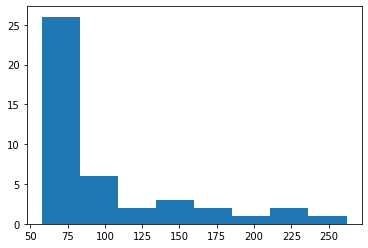

In [29]:
#2008
#Did countries distribute points equally or did they give high scores to less countries and less scores to the majority?
network_2008_und = network_2008.to_undirected(reciprocal=False)
strengths = [network_2008_und.degree(n, weight='weight') for n in network_2008_und.nodes()]
plt.hist(strengths, bins = 8)
plt.show()
#strengths = [network_2008.degree(n, weight='weight') for n in network_2008.nodes()] strength aynı grefiği çıkarttı

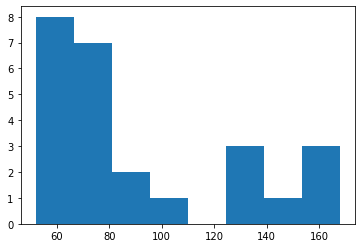

In [30]:
#1998
#Did countries distribute points equally or did they give high scores to less countries and less scores to the majority?
network_1998_und = network_1998.to_undirected(reciprocal=False)
strengths = [network_1998_und.degree(n, weight='weight') for n in network_1998_und.nodes()]
plt.hist(strengths, bins = 8)
plt.show()
#strengths = [network_1998.degree(n, weight='weight') for n in network_1998.nodes()] strength benzer grafiği çıkarttı

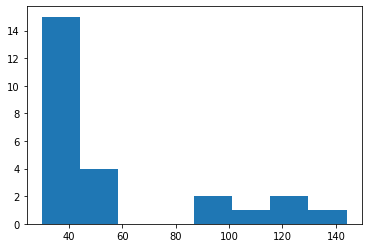

In [31]:
#1998 weight
#Did countries distribute points equally or did they give high scores to less countries and less scores to the majority?
network_1998_upper_weight_und = network_1998_upper_weight.to_undirected(reciprocal=False)
strengths = [network_1998_upper_weight_und.degree(n, weight='weight') for n in network_1998_upper_weight_und.nodes()]
plt.hist(strengths, bins = 8)
plt.show()
#strengths = [network_1998_upper_weight.degree(n, weight='weight') for n in network_1998_upper_weight.nodes()] strength benzer grafik çıkarttı

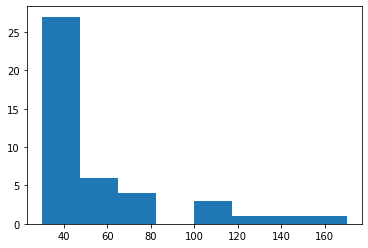

In [32]:
#2008 weight
#Did countries distribute points equally or did they give high scores to less countries and less scores to the majority?
network_2008_upper_weight_und = network_2008_upper_weight.to_undirected(reciprocal=False)
strengths = [network_2008_upper_weight_und.degree(n, weight='weight') for n in network_2008_upper_weight_und.nodes()]
plt.hist(strengths, bins = 8)
plt.show()

#strengths = [network_2008_upper_weight.degree(n, weight='weight') for n in network_2008_upper_weight.nodes()] strength benzer grafik çıkarttı

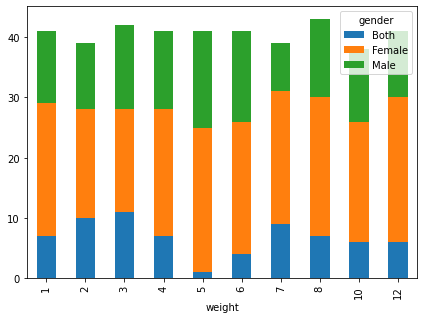

In [34]:
# 2008 gender
dfgender = df2008[["target","weight"]]
properties = pd.read_excel("properties.xlsx")
properties=properties[properties["Year"]==2008]
properties2=properties[["Country   ","Artist gender"]]
properties2.columns = ['target', 'gender']
dfgender2=dfgender.merge(properties2, on='target', how='left')
IntlPlan_table = pd.crosstab(index=dfgender2['weight'],columns=dfgender2['gender'])
IntlPlan_table.plot(kind='bar', stacked=True, figsize=(7,5));

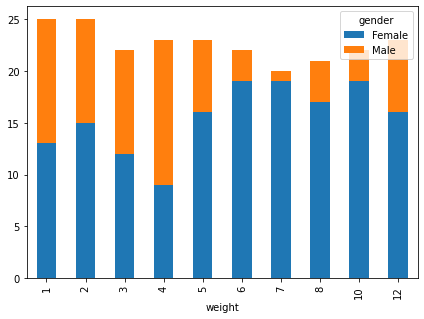

In [39]:
# 1998 gender
dfgender = df1998[["target","weight"]]
properties = pd.read_excel("properties.xlsx")
properties=properties[properties["Year"]==1998]
properties2=properties[["Country   ","Artist gender"]]
properties2.columns = ['target', 'gender']
dfgender2=dfgender.merge(properties2, on='target', how='left')
IntlPlan_table = pd.crosstab(index=dfgender2['weight'],columns=dfgender2['gender'])
IntlPlan_table.plot(kind='bar', stacked=True, figsize=(7,5));

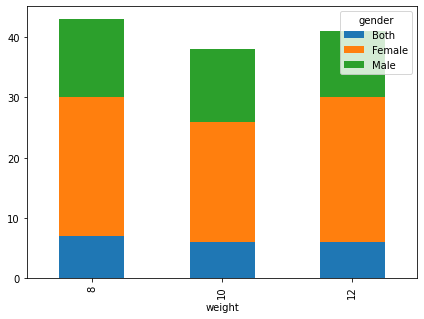

In [40]:
# 2008 upper weight gender
dfgender = df2008_upper_weight[["target","weight"]]
properties = pd.read_excel("properties.xlsx")
properties=properties[properties["Year"]==2008]
properties2=properties[["Country   ","Artist gender"]]
properties2.columns = ['target', 'gender']
dfgender2=dfgender.merge(properties2, on='target', how='left')
IntlPlan_table = pd.crosstab(index=dfgender2['weight'],columns=dfgender2['gender'])
IntlPlan_table.plot(kind='bar', stacked=True, figsize=(7,5));

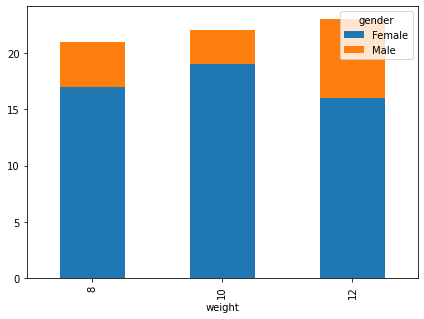

In [41]:
# 1998 upper weight gender
dfgender = df1998_upper_weight[["target","weight"]]
properties = pd.read_excel("properties.xlsx")
properties=properties[properties["Year"]==1998]
properties2=properties[["Country   ","Artist gender"]]
properties2.columns = ['target', 'gender']
dfgender2=dfgender.merge(properties2, on='target', how='left')
IntlPlan_table = pd.crosstab(index=dfgender2['weight'],columns=dfgender2['gender'])
IntlPlan_table.plot(kind='bar', stacked=True, figsize=(7,5));

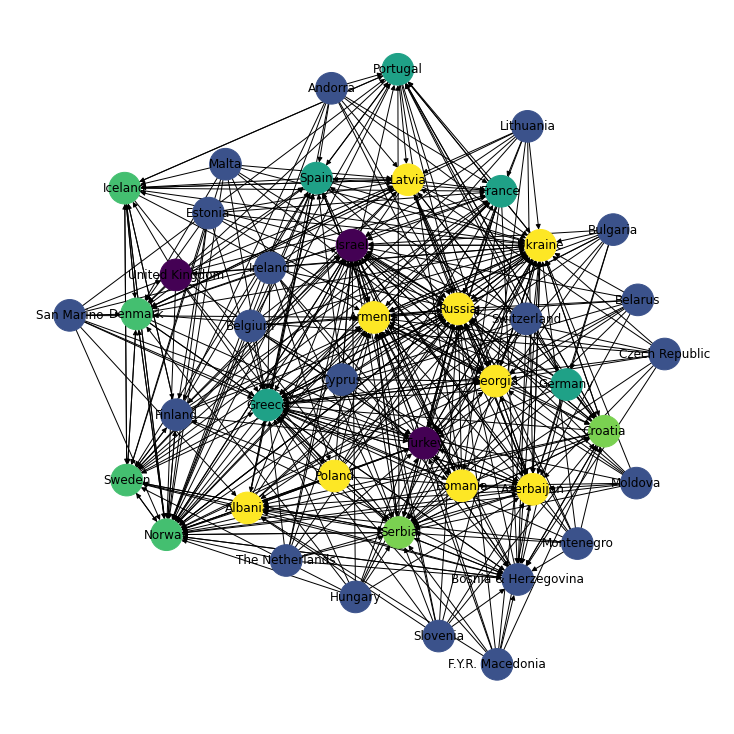

In [99]:
#2008
val_map = {'Romania': 1.0, #Former Socialist Bloc
           'Albania': 1.0, #Former Socialist Bloc
           'Poland': 1.0, #Former Socialist Bloc
           'Latvia': 1.0, #Former Socialist Bloc
           'Armenia': 1.0, #Former Socialist Bloc
           'Georgia': 1.0, #Former Socialist Bloc
           'Ukraine': 1.0, #Former Socialist Bloc
           'Azerbaijan': 1.0, #Former Socialist Bloc
           'Russia': 1.0, #Former Socialist Bloc
           'Bosnia and Herzegovina': 0.80, #Former Yugoslavia
           'Croatia': 0.80, #Former Yugoslavia
           'Serbia': 0.80, #Former Yugoslavia          
           'Finland ': 0.70, #Scandinavia
           'Iceland': 0.70,  #Scandinavia
           'Sweden': 0.70, #Scandinavia 
           'Denmark': 0.70, #Scandinavia
           'Norway': 0.70,  #Scandinavia           
           'Germany': 0.5714285714285714, #Western Europe
           'Portugal': 0.5714285714285714, #Western Europe
           'France': 0.5714285714285714, #Western Europe
           'Greece': 0.5714285714285714, #Western Europe
           'Spain': 0.5714285714285714, #Western Europe
           'Turkey': 0.0, #Independent
           'United Kingdom': 0.0, #Independent
           'Israel': 0.0} #Independent
values = [val_map.get(node, 0.25) for node in network_2008.nodes()]
plt.rcParams['figure.figsize'] = [10, 10]
nx.draw(network_2008,with_labels=True, cmap=plt.get_cmap('viridis'), node_color=values, node_size=1000)

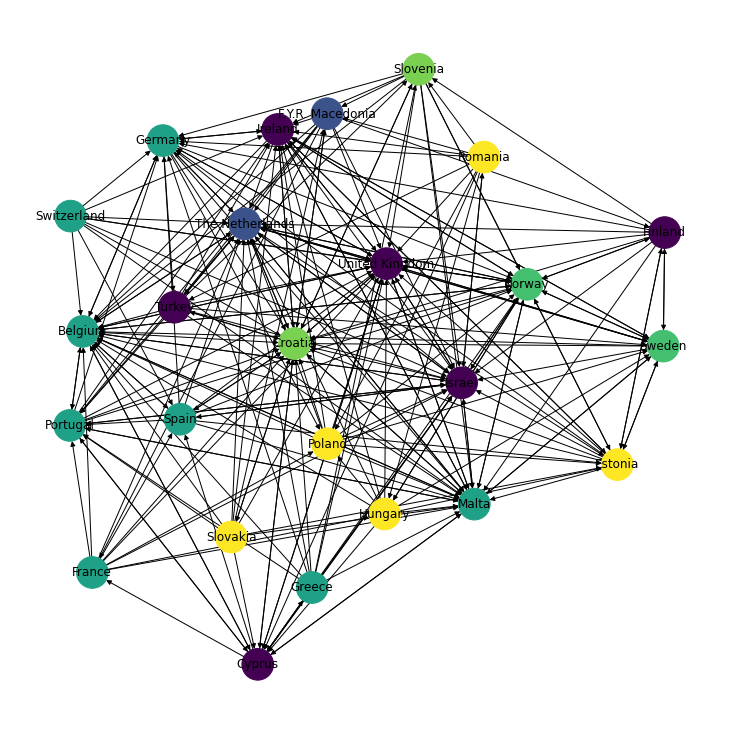

In [100]:
#1998
val_map = {'Slovakia': 1.0, #Former Socialist Bloc
           'Poland': 1.0, #Former Socialist Bloc
           'Hungary': 1.0, #Former Socialist Bloc
           'Romania': 1.0, #Former Socialist Bloc
           'Estonia': 1.0, #Former Socialist Bloc           
           'Slovenia': 0.80, #Former Yugoslavia
           'Croatia': 0.80, #Former Yugoslavia
           'Macedonia': 0.80, #Former Yugoslavia   
           'Sweden': 0.70, #Scandinavia 
           'Norway': 0.70,  #Scandinavia               
           'Greece': 0.5714285714285714, #Western Europe
           'France': 0.5714285714285714, #Western Europe
           'Spain': 0.5714285714285714, #Western Europe
           'Switzerland': 0.5714285714285714, #Western Europe
           'Germany': 0.5714285714285714, #Western Europe
           'Malta': 0.5714285714285714, #Western Europe
           'Portugal': 0.5714285714285714, #Western Europe
           'Netherlands': 0.5714285714285714, #Western Europe
           'Belgium': 0.5714285714285714, #Western Europe         
           'Israel': 0.0, #Independent
           'Ireland': 0.0, #Independent
           'United Kingdom': 0.0, #Independent
           'Cyprus': 0.0, #Independent
           'Finland': 0.0, #Independent
           'Turkey': 0.0} #Independent
values = [val_map.get(node, 0.25) for node in network_1998.nodes()]
plt.rcParams['figure.figsize'] = [10, 10]
nx.draw(network_1998,with_labels=True, cmap=plt.get_cmap('viridis'), node_color=values, node_size=1000)

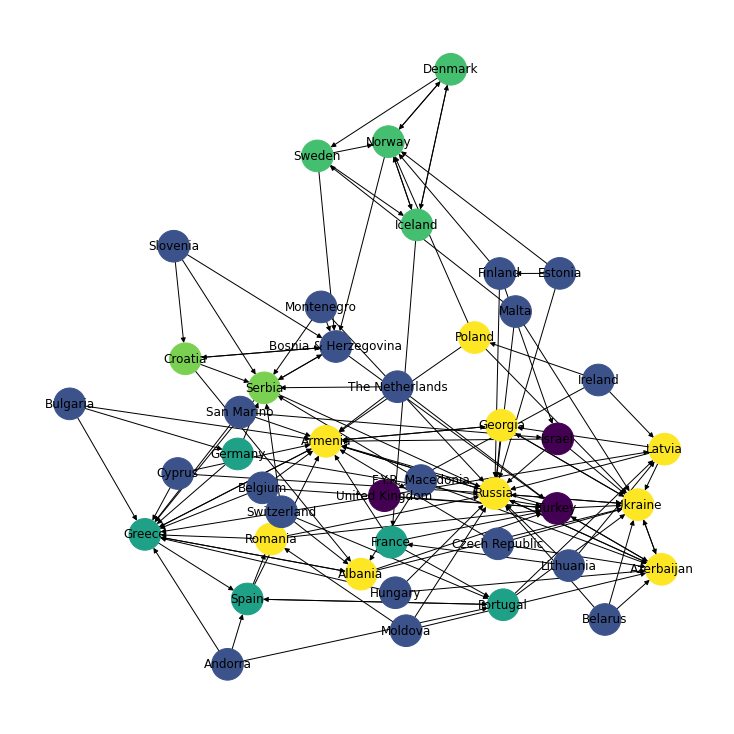

In [101]:
#2008 upper weight
val_map = {'Romania': 1.0, #Former Socialist Bloc
           'Albania': 1.0, #Former Socialist Bloc
           'Poland': 1.0, #Former Socialist Bloc
           'Latvia': 1.0, #Former Socialist Bloc
           'Armenia': 1.0, #Former Socialist Bloc
           'Georgia': 1.0, #Former Socialist Bloc
           'Ukraine': 1.0, #Former Socialist Bloc
           'Azerbaijan': 1.0, #Former Socialist Bloc
           'Russia': 1.0, #Former Socialist Bloc
           'Bosnia and Herzegovina': 0.80, #Former Yugoslavia
           'Croatia': 0.80, #Former Yugoslavia
           'Serbia': 0.80, #Former Yugoslavia          
           'Finland ': 0.70, #Scandinavia
           'Iceland': 0.70,  #Scandinavia
           'Sweden': 0.70, #Scandinavia 
           'Denmark': 0.70, #Scandinavia
           'Norway': 0.70,  #Scandinavia           
           'Germany': 0.5714285714285714, #Western Europe
           'Portugal': 0.5714285714285714, #Western Europe
           'France': 0.5714285714285714, #Western Europe
           'Greece': 0.5714285714285714, #Western Europe
           'Spain': 0.5714285714285714, #Western Europe
           'Turkey': 0.0, #Independent
           'United Kingdom': 0.0, #Independent
           'Israel': 0.0} #Independent
values = [val_map.get(node, 0.25) for node in network_2008_upper_weight.nodes()]
plt.rcParams['figure.figsize'] = [10, 10]
nx.draw(network_2008_upper_weight,with_labels=True, cmap=plt.get_cmap('viridis'), node_color=values, node_size=1000)

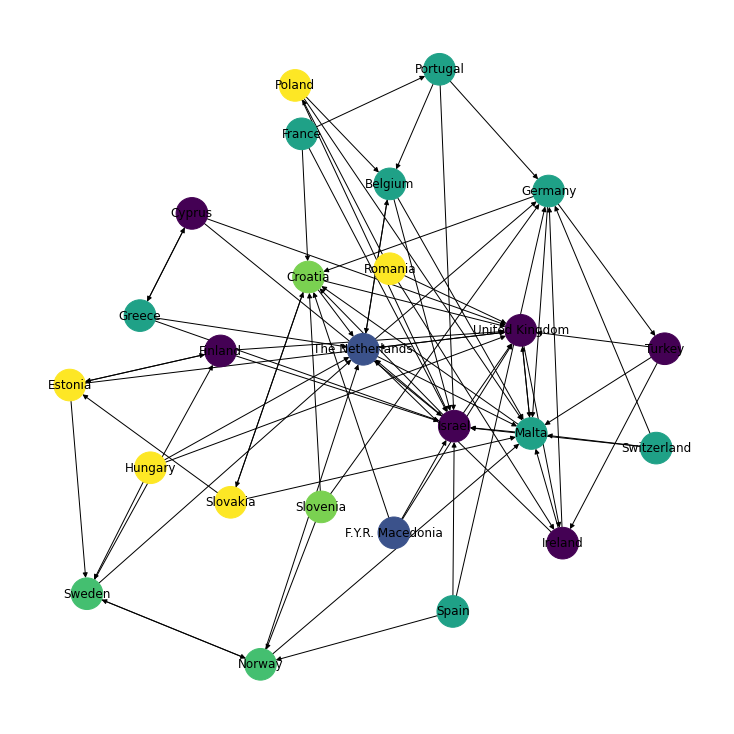

In [102]:
#1998 upper weight
val_map = {'Slovakia': 1.0, #Former Socialist Bloc
           'Poland': 1.0, #Former Socialist Bloc
           'Hungary': 1.0, #Former Socialist Bloc
           'Romania': 1.0, #Former Socialist Bloc
           'Estonia': 1.0, #Former Socialist Bloc           
           'Slovenia': 0.80, #Former Yugoslavia
           'Croatia': 0.80, #Former Yugoslavia
           'Macedonia': 0.80, #Former Yugoslavia   
           'Sweden': 0.70, #Scandinavia 
           'Norway': 0.70,  #Scandinavia               
           'Greece': 0.5714285714285714, #Western Europe
           'France': 0.5714285714285714, #Western Europe
           'Spain': 0.5714285714285714, #Western Europe
           'Switzerland': 0.5714285714285714, #Western Europe
           'Germany': 0.5714285714285714, #Western Europe
           'Malta': 0.5714285714285714, #Western Europe
           'Portugal': 0.5714285714285714, #Western Europe
           'Netherlands': 0.5714285714285714, #Western Europe
           'Belgium': 0.5714285714285714, #Western Europe         
           'Israel': 0.0, #Independent
           'Ireland': 0.0, #Independent
           'United Kingdom': 0.0, #Independent
           'Cyprus': 0.0, #Independent
           'Finland': 0.0, #Independent
           'Turkey': 0.0} #Independent
values = [val_map.get(node, 0.25) for node in network_1998_upper_weight.nodes()]
plt.rcParams['figure.figsize'] = [10, 10]
nx.draw(network_1998_upper_weight,with_labels=True, cmap=plt.get_cmap('viridis'), node_color=values, node_size=1000)

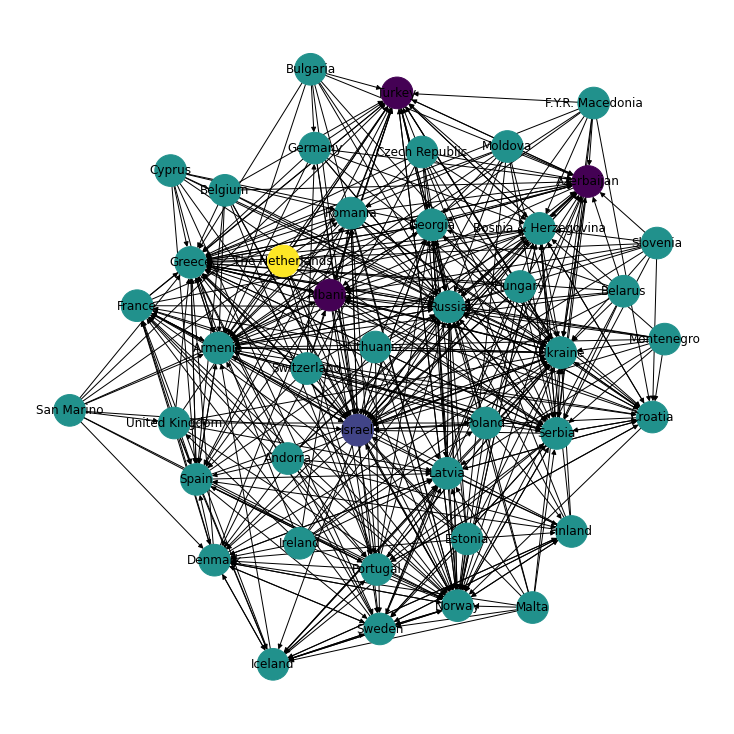

In [107]:
#2008 religion
val_map = {'Belgium':0.5,
'Finland':0.5,
'France':0.5,
'Germany':0.5,
'Ireland':0.5,
'Israel':0.2,
'Malta':0.5,
'Norway':0.5,
'Portugal':0.5,
'Spain':0.5,
'Sweden':0.5,
'Switzerland':0.5,
'The Netherlands':1.0,
'Turkey':0.0,
'United Kingdom':0.5,
'Greece':0.5,
'Denmark':0.5,
'Cyprus':0.5,
'Iceland':0.5,
'Bosnia & Herzegovina':0.5,
'Croatia':0.5,
'Slovenia':0.5,
'Estonia':0.5,
'Hungary':0.5,
'Lithuania':0.5,
'Poland':0.5,
'Romania':0.5,
'Russia':0.5,
'Slovakia':0.5,
'F.Y.R. Macedonia':0.5,
'Latvia':0.5,
'Ukraine':0.5,
'Albania':0.3,
'Andorra':0.5,
'Belarus':0.5,
'Bulgaria':0.5,
'Moldova':0.5,
'Armenia':0.5,
'Czech Republic':0.5,
'Montenegro':0.5,
'Serbia':0.5,
'Azerbaijan':0.0,
'Albania':0.0,
'San Marino':0.5,
'Georgia':0.5
} 
values = [val_map.get(node, 0.25) for node in network_2008.nodes()]
plt.rcParams['figure.figsize'] = [10, 10]
nx.draw(network_2008,with_labels=True, cmap=plt.get_cmap('viridis'), node_color=values, node_size=1000)